# Topic: Customer Clustering with RFM 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import squarify
from datetime import datetime

Data understanding

In [3]:
products = pd.read_csv('Data/Products_with_Categories.csv')
transactions = pd.read_csv('Data/Transactions.csv')

In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   productId    167 non-null    int64  
 1   productName  167 non-null    object 
 2   price        167 non-null    float64
 3   Category     167 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 5.3+ KB


In [5]:
products.head(5)

,productId,productName,price,Category
0,1,tropical fruit,7.8,Fresh Food
1,2,whole milk,1.8,Dairy
2,3,pip fruit,3.0,Fresh Food
3,4,other vegetables,0.8,Fresh Food
4,5,rolls/buns,1.2,Bakery & Sweets


In [6]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Member_number  38765 non-null  int64 
 1   Date           38765 non-null  object
 2   productId      38765 non-null  int64 
 3   items          38765 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.2+ MB


In [7]:
transactions.head(5)

,Member_number,Date,productId,items
0,1808,21-07-2015,1,3
1,2552,05-01-2015,2,1
2,2300,19-09-2015,3,3
3,1187,12-12-2015,4,3
4,3037,01-02-2015,2,1


Data Pre-processing

In [8]:
string_to_date = lambda x : datetime.strptime(x, "%d-%m-%Y").date()
transactions['Date'] = transactions['Date'].apply(string_to_date)
transactions['Date'] = transactions['Date'].astype('datetime64[ns]')

In [9]:
transactions.isnull().sum()

Member_number    0
Date             0
productId        0
items            0
dtype: int64

In [10]:
products.isnull().sum()

productId      0
productName    0
price          0
Category       0
dtype: int64

In [11]:
transactions.isna().sum()

Member_number    0
Date             0
productId        0
items            0
dtype: int64

In [12]:
products.isna().sum()

productId      0
productName    0
price          0
Category       0
dtype: int64

In [13]:
df = transactions.merge(products, on='productId', how='left')

In [14]:
df.head(5)

,Member_number,Date,productId,items,productName,price,Category
0,1808,2015-07-21,1,3,tropical fruit,7.8,Fresh Food
1,2552,2015-01-05,2,1,whole milk,1.8,Dairy
2,2300,2015-09-19,3,3,pip fruit,3.0,Fresh Food
3,1187,2015-12-12,4,3,other vegetables,0.8,Fresh Food
4,3037,2015-02-01,2,1,whole milk,1.8,Dairy


In [15]:
df['total_sales'] = df['items'] * df['price']

In [16]:
df['transaction_id'] = range(1,len(df)+1)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38765 entries, 0 to 38764
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Member_number   38765 non-null  int64         
 1   Date            38765 non-null  datetime64[ns]
 2   productId       38765 non-null  int64         
 3   items           38765 non-null  int64         
 4   productName     38765 non-null  object        
 5   price           38765 non-null  float64       
 6   Category        38765 non-null  object        
 7   total_sales     38765 non-null  float64       
 8   transaction_id  38765 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 3.0+ MB


In [18]:
df.isnull().sum()

Member_number     0
Date              0
productId         0
items             0
productName       0
price             0
Category          0
total_sales       0
transaction_id    0
dtype: int64

In [19]:
df.isna().any()

Member_number     False
Date              False
productId         False
items             False
productName       False
price             False
Category          False
total_sales       False
transaction_id    False
dtype: bool

In [20]:
print('{:,} unique member_number'.format(transactions['Member_number'].nunique()))
print('Transactions timeframe from {} to {}'.format(transactions['Date'].min(), transactions['Date'].max()))

3,898 unique member_number
Transactions timeframe from 2014-01-01 00:00:00 to 2015-12-30 00:00:00


In [21]:
df.where(df['price']<0).any()

Member_number     False
Date              False
productId         False
items             False
productName       False
price             False
Category          False
total_sales       False
transaction_id    False
dtype: bool

In [22]:
df.where(df['items']<=0).any()

Member_number     False
Date              False
productId         False
items             False
productName       False
price             False
Category          False
total_sales       False
transaction_id    False
dtype: bool

RFM

In [23]:
max_date = df['Date'].max().date()

Recency = Recency = lambda x : (max_date - x.max().date()).days
Frequency  = lambda x: len(x.unique())
Monetary = lambda x: sum(x)

df_RFM = df.groupby('Member_number').agg({'Date':Recency,
                                          'transaction_id': Frequency,
                                          'total_sales':Monetary})


In [24]:
df_RFM.head()

,Date,transaction_id,total_sales
Member_number,,,
1000,35,13,53.80
1001,242,12,100.00
1002,122,8,70.30
1003,323,8,60.65
1004,28,21,204.96


In [25]:
df_RFM.columns = ['Recency', 'Frequency', 'Monetary']

In [26]:
df_RFM.head()

,Recency,Frequency,Monetary
Member_number,,,
1000,35,13,53.80
1001,242,12,100.00
1002,122,8,70.30
1003,323,8,60.65
1004,28,21,204.96


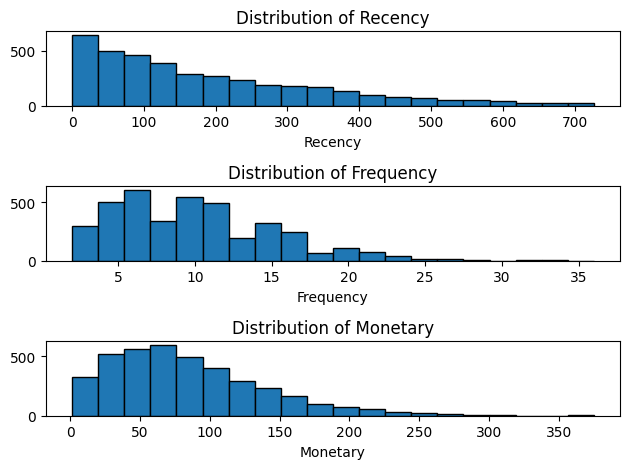

In [27]:
# Vẽ phân phối của 'Recency'
plt.subplot(3, 1, 1) # 3 hàng, 1 cột, vị trí thứ nhất
plt.hist(df_RFM['Recency'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Recency')
plt.xlabel('Recency')

# Vẽ phân phối của 'Frequency'
plt.subplot(3, 1, 2) # 3 hàng, 1 cột, vị trí thứ hai
plt.hist(df_RFM['Frequency'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3) # 3 hàng, 1 cột, vị trí thứ ba
plt.hist(df_RFM['Monetary'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

Cả 3 Recency, Frequency and Monetary đều right skew và không phải normal distribution --> Log transfomation để giảm skewness

In [28]:
df_log_transformed = df_RFM.apply(lambda x: np.log1p(x) if x.name in ['Recency', 'Frequency', 'Monetary'] else x)

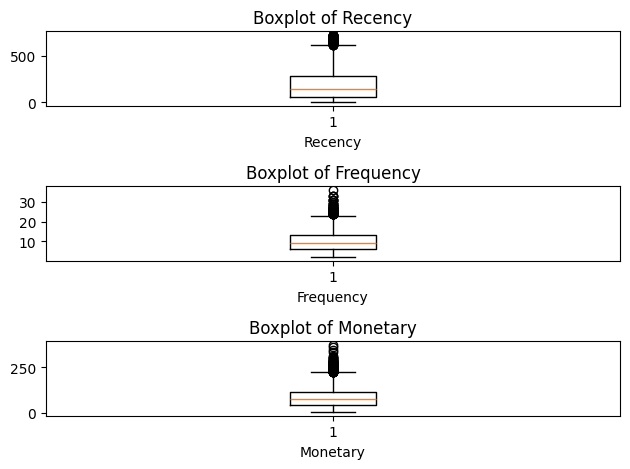

In [29]:
# Vẽ phân phối của 'Recency'
plt.subplot(3, 1, 1) # 3 hàng, 1 cột, vị trí thứ nhất
plt.boxplot(df_RFM['Recency']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Recency')
plt.xlabel('Recency')

# Vẽ phân phối của 'Frequency'
plt.subplot(3, 1, 2) # 3 hàng, 1 cột, vị trí thứ hai
plt.boxplot(df_RFM['Frequency']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3) # 3 hàng, 1 cột, vị trí thứ ba
plt.boxplot(df_RFM['Monetary']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

Cả 3 Recency, Frequency and Monetary đều có nhiều upper outliers --> Robust Scaler để giảm ảnh hưởng của outliers

In [30]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
df_scaled = pd.DataFrame(robust.fit_transform(df_log_transformed[['Recency', 'Frequency', 'Monetary']]), 
                         columns=['Recency_scaled', 'Frequency_scaled', 'Monetary_scaled'], 
                         index=df_RFM.index)

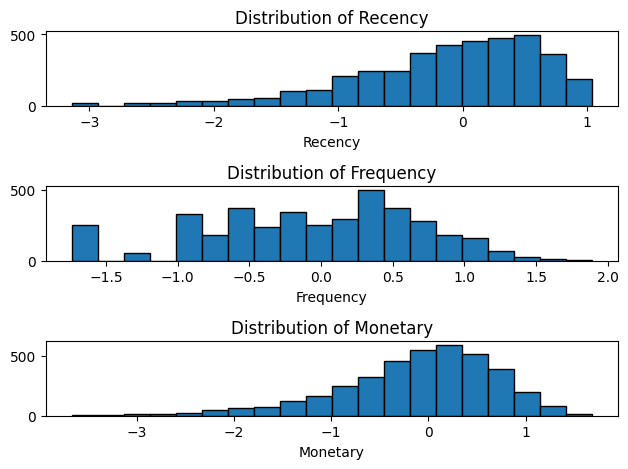

In [31]:
# Vẽ phân phối của 'Recency'
plt.subplot(3, 1, 1) # 3 hàng, 1 cột, vị trí thứ nhất
plt.hist(df_scaled['Recency_scaled'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Recency')
plt.xlabel('Recency')

# Vẽ phân phối của 'Frequency'
plt.subplot(3, 1, 2) # 3 hàng, 1 cột, vị trí thứ hai
plt.hist(df_scaled['Frequency_scaled'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3) # 3 hàng, 1 cột, vị trí thứ ba
plt.hist(df_scaled['Monetary_scaled'], bins=20, edgecolor='black') # Chọn số lượng bins phù hợp
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

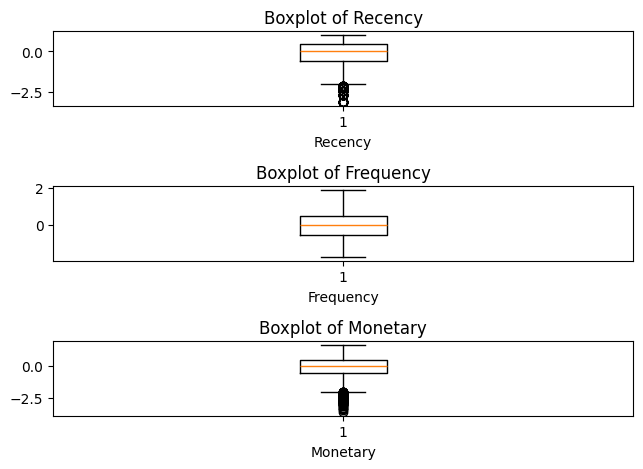

In [32]:
# Vẽ phân phối của 'Recency'
plt.subplot(3, 1, 1) # 3 hàng, 1 cột, vị trí thứ nhất
plt.boxplot(df_scaled['Recency_scaled']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Recency')
plt.xlabel('Recency')

# Vẽ phân phối của 'Frequency'
plt.subplot(3, 1, 2) # 3 hàng, 1 cột, vị trí thứ hai
plt.boxplot(df_scaled['Frequency_scaled']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3) # 3 hàng, 1 cột, vị trí thứ ba
plt.boxplot(df_scaled['Monetary_scaled']) # Chọn số lượng bins phù hợp
plt.title('Boxplot of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

In [33]:
df_scaled.head()

,Recency_scaled,Frequency_scaled,Monetary_scaled
Member_number,,,
1000,-0.869699,0.485427,-0.341540
1001,0.340472,0.378512,0.299574
1002,-0.091033,-0.152003,-0.065556
1003,0.522790,-0.152003,-0.218039
1004,-1.006730,1.137504,1.046730


In [34]:
products['Category'].count()

167

In [35]:
df['items'].sum()

77380

In [36]:
df['total_sales'].sum()

332159.62999999995

In [37]:
df['transaction_id'].count()

38765

In [38]:
df.head()

,Member_number,Date,productId,items,productName,price,Category,total_sales,transaction_id
0,1808,2015-07-21,1,3,tropical fruit,7.8,Fresh Food,23.4,1
1,2552,2015-01-05,2,1,whole milk,1.8,Dairy,1.8,2
2,2300,2015-09-19,3,3,pip fruit,3.0,Fresh Food,9.0,3
3,1187,2015-12-12,4,3,other vegetables,0.8,Fresh Food,2.4,4
4,3037,2015-02-01,2,1,whole milk,1.8,Dairy,1.8,5


In [39]:
df.head()

,Member_number,Date,productId,items,productName,price,Category,total_sales,transaction_id
0,1808,2015-07-21,1,3,tropical fruit,7.8,Fresh Food,23.4,1
1,2552,2015-01-05,2,1,whole milk,1.8,Dairy,1.8,2
2,2300,2015-09-19,3,3,pip fruit,3.0,Fresh Food,9.0,3
3,1187,2015-12-12,4,3,other vegetables,0.8,Fresh Food,2.4,4
4,3037,2015-02-01,2,1,whole milk,1.8,Dairy,1.8,5


In [40]:
df['Member_number'].count()

38765

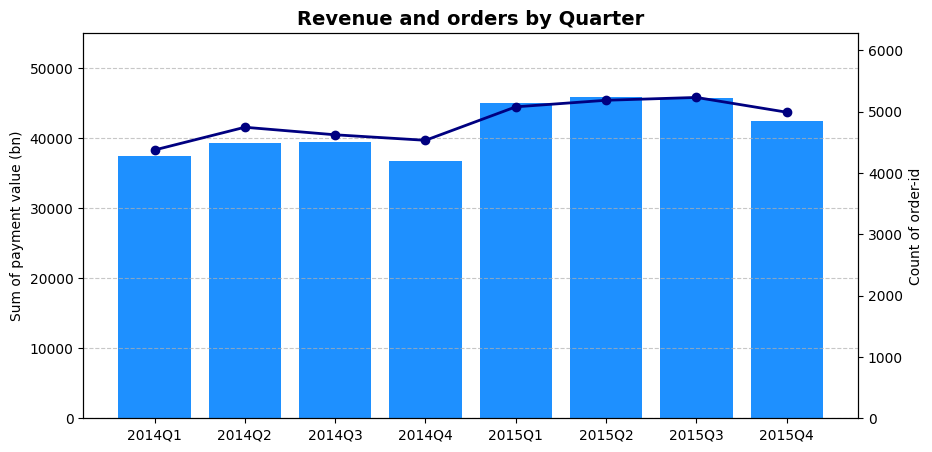

In [41]:
# Chuyển đổi cột Date sang kiểu datetime
df["Date"] = pd.to_datetime(df["Date"])

# Tạo cột "Quarter" và "Year"
df["Year"] = df["Date"].dt.year
df["Quarter"] = df["Date"].dt.to_period("Q")

# Tổng hợp doanh thu và số lượng đơn hàng theo quý
df_quarterly = df.groupby("Quarter").agg(
    total_revenue=("total_sales", "sum"),  
    order_count=("transaction_id", "count")  
).reset_index()

# Chuyển đổi dạng quý thành chuỗi để dễ biểu diễn
df_quarterly["Quarter"] = df_quarterly["Quarter"].astype(str)

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(10, 5))

# Vẽ cột doanh thu
ax1.bar(df_quarterly["Quarter"], df_quarterly["total_revenue"], color="dodgerblue", label="Doanh thu ($)")
ax1.set_ylabel("Sum of payment value (bn)")
ax1.set_ylim(0, df_quarterly["total_revenue"].max() * 1.2)

# Trục thứ hai vẽ đường số lượng đơn hàng
ax2 = ax1.twinx()
ax2.plot(df_quarterly["Quarter"], df_quarterly["order_count"], color="navy", marker="o", linewidth=2, label="Số lượng đơn hàng")
ax2.set_ylabel("Count of order-id")
ax2.set_ylim(0, df_quarterly["order_count"].max() * 1.2)

# Tiêu đề
plt.title("Revenue and orders by Quarter", fontsize=14, fontweight="bold")

# Xoay nhãn trục x để dễ nhìn
plt.xticks(rotation=45)

# Đường lưới
ax1.grid(axis="y", linestyle="--", alpha=0.7)

# Hiển thị biểu đồ
plt.show()


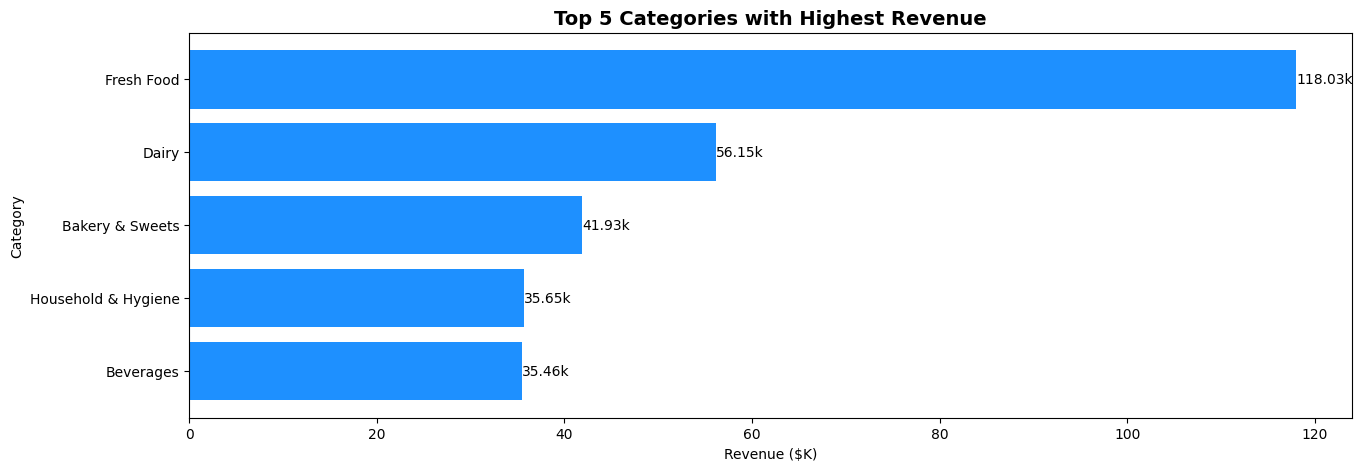

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Nhóm doanh thu theo ngành hàng (Category)
df_category = df.groupby("Category")["total_sales"].sum().reset_index()

# Sắp xếp theo tổng doanh thu và lấy 5 ngành hàng cao nhất
df_top5 = df_category.sort_values(by="total_sales", ascending=False).head(5)

# Chuyển doanh thu sang đơn vị triệu đô (M)
df_top5["total_sales"] = df_top5["total_sales"] / 1_000

# Vẽ biểu đồ cột ngang
plt.figure(figsize=(15, 5))
plt.barh(df_top5["Category"], df_top5["total_sales"], color="dodgerblue")

# Thêm nhãn và tiêu đề
plt.xlabel("Revenue ($K)")
plt.ylabel("Category")
plt.title("Top 5 Categories with Highest Revenue", fontsize=14, fontweight="bold")

# Hiển thị giá trị trên cột (định dạng 'xx.xx M')
for index, value in enumerate(df_top5["total_sales"]):
    plt.text(value, index, f"{value:,.2f}k", va='center')

# Đảo trục y để ngành có doanh thu cao nhất nằm trên cùng
plt.gca().invert_yaxis()

# Hiển thị biểu đồ
plt.show()


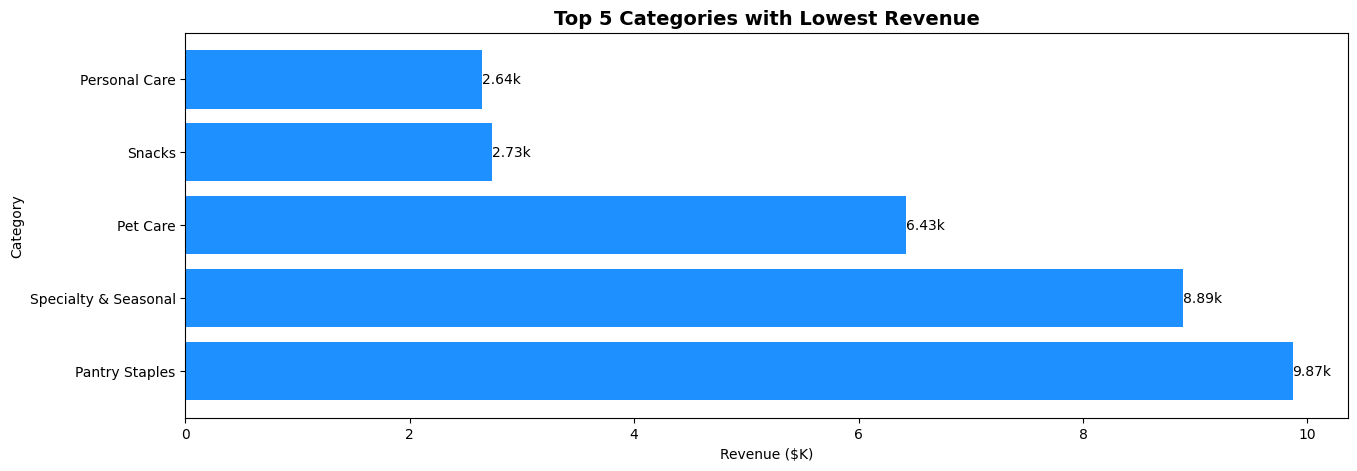

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Nhóm doanh thu theo ngành hàng (Category)
df_category = df.groupby("Category")["total_sales"].sum().reset_index()

# Sắp xếp theo tổng doanh thu và lấy 5 ngành hàng cao nhất
df_top5 = df_category.sort_values(by="total_sales", ascending=True).head(5)

# Chuyển doanh thu sang đơn vị triệu đô (M)
df_top5["total_sales"] = df_top5["total_sales"] / 1_000

# Vẽ biểu đồ cột ngang
plt.figure(figsize=(15, 5))
plt.barh(df_top5["Category"], df_top5["total_sales"], color="dodgerblue")

# Thêm nhãn và tiêu đề
plt.xlabel("Revenue ($K)")
plt.ylabel("Category")
plt.title("Top 5 Categories with Lowest Revenue", fontsize=14, fontweight="bold")

# Hiển thị giá trị trên cột (định dạng 'xx.xx M')
for index, value in enumerate(df_top5["total_sales"]):
    plt.text(value, index, f"{value:,.2f}k", va='center')

# Đảo trục y để ngành có doanh thu cao nhất nằm trên cùng
plt.gca().invert_yaxis()

# Hiển thị biểu đồ
plt.show()


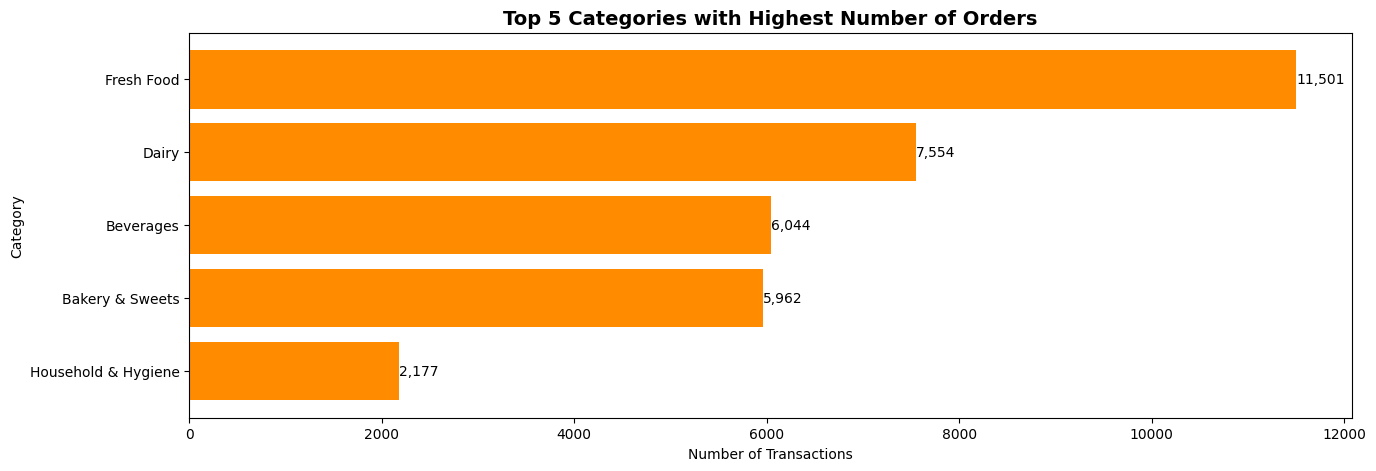

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Nhóm số lượng đơn hàng theo ngành hàng (Category)
df_category = df.groupby("Category")["transaction_id"].count().reset_index()

# Sắp xếp theo số lượng đơn hàng và lấy 5 ngành hàng cao nhất
df_top5 = df_category.sort_values(by="transaction_id", ascending=False).head(5)

# Vẽ biểu đồ cột ngang
plt.figure(figsize=(15, 5))
plt.barh(df_top5["Category"], df_top5["transaction_id"], color="darkorange")

# Thêm nhãn và tiêu đề
plt.xlabel("Number of Transactions")
plt.ylabel("Category")
plt.title("Top 5 Categories with Highest Number of Orders", fontsize=14, fontweight="bold")

# Hiển thị giá trị trên cột
for index, value in enumerate(df_top5["transaction_id"]):
    plt.text(value, index, f"{value:,}", va='center')

# Đảo trục y để ngành có số lượng đơn hàng cao nhất nằm trên cùng
plt.gca().invert_yaxis()

# Hiển thị biểu đồ
plt.show()


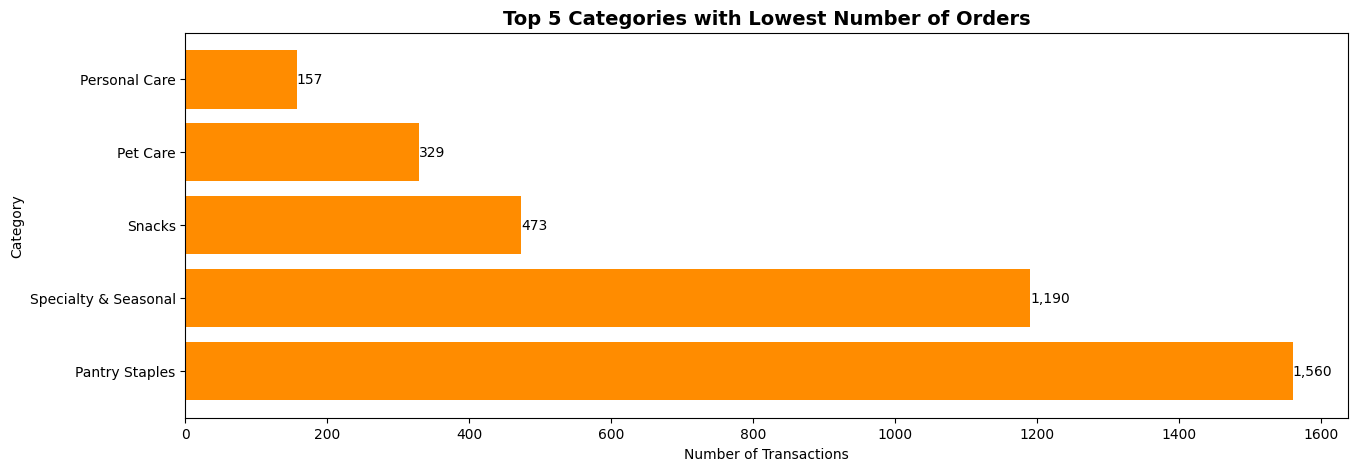

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Nhóm số lượng đơn hàng theo ngành hàng (Category)
df_category = df.groupby("Category")["transaction_id"].count().reset_index()

# Sắp xếp theo số lượng đơn hàng và lấy 5 ngành hàng cao nhất
df_top5 = df_category.sort_values(by="transaction_id", ascending=True).head(5)

# Vẽ biểu đồ cột ngang
plt.figure(figsize=(15, 5))
plt.barh(df_top5["Category"], df_top5["transaction_id"], color="darkorange")

# Thêm nhãn và tiêu đề
plt.xlabel("Number of Transactions")
plt.ylabel("Category")
plt.title("Top 5 Categories with Lowest Number of Orders", fontsize=14, fontweight="bold")

# Hiển thị giá trị trên cột
for index, value in enumerate(df_top5["transaction_id"]):
    plt.text(value, index, f"{value:,}", va='center')

# Đảo trục y để ngành có số lượng đơn hàng cao nhất nằm trên cùng
plt.gca().invert_yaxis()

# Hiển thị biểu đồ
plt.show()


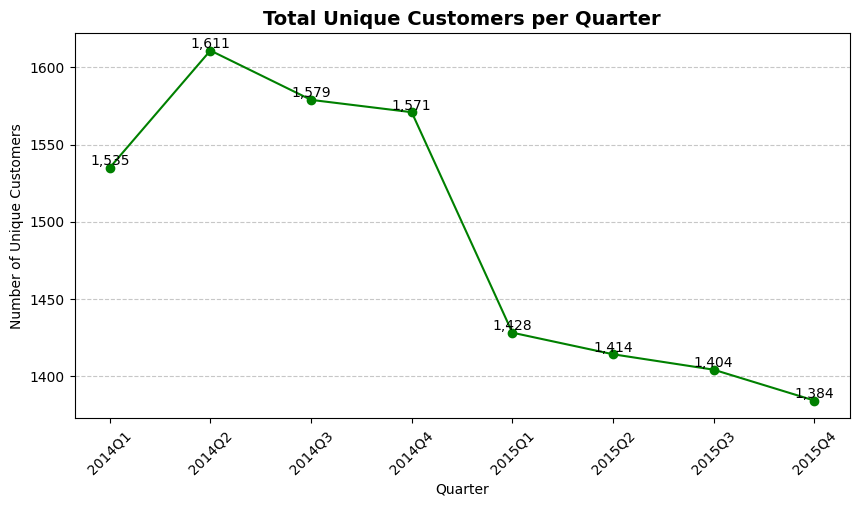

In [48]:
import pandas as pd
import matplotlib.pyplot as plt


# Trích xuất thông tin quý và năm
df["Quarter"] = df["Date"].dt.to_period("Q")  # YYYYQx format

# Đếm số lượng khách hàng duy nhất theo quý
df_quarterly = df.groupby("Quarter")["Member_number"].nunique().reset_index()

# Chuyển đổi cột Quarter về dạng chuỗi để hiển thị rõ ràng hơn
df_quarterly["Quarter"] = df_quarterly["Quarter"].astype(str)

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 5))
plt.plot(df_quarterly["Quarter"], df_quarterly["Member_number"], marker="o", linestyle="-", color="green")

# Thêm nhãn và tiêu đề
plt.xlabel("Quarter")
plt.ylabel("Number of Unique Customers")
plt.title("Total Unique Customers per Quarter", fontsize=14, fontweight="bold")

# Hiển thị giá trị trên từng điểm dữ liệu
for index, value in enumerate(df_quarterly["Member_number"]):
    plt.text(index, value, f"{value:,}", ha='center', va='bottom')

# Định dạng trục X
plt.xticks(rotation=45)  # Xoay trục x để dễ đọc
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Thêm lưới

# Hiển thị biểu đồ
plt.show()


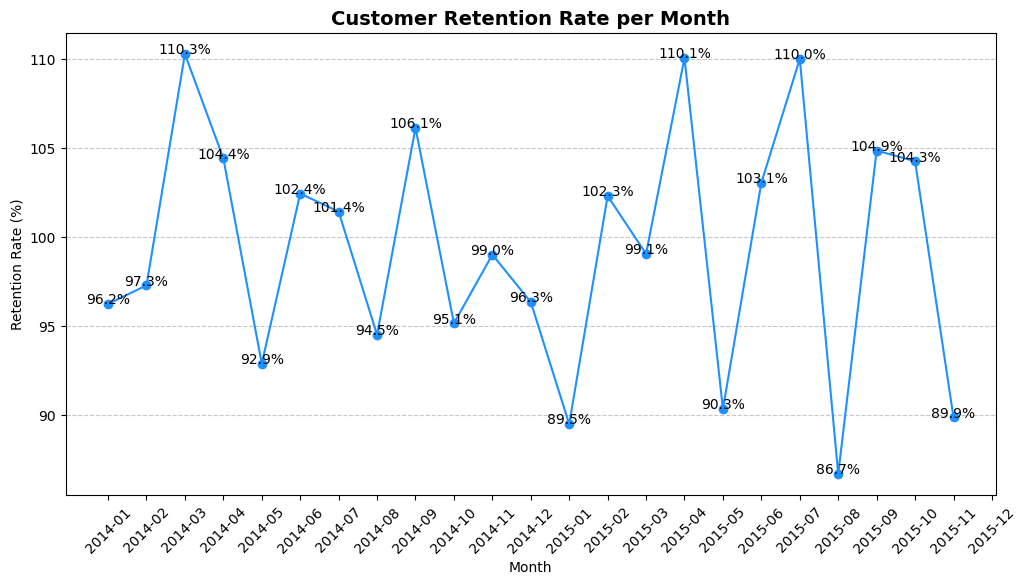

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Chuyển đổi cột Date thành kiểu datetime
df["Date"] = pd.to_datetime(df["Date"])
df["Month"] = df["Date"].dt.to_period("M")  # Lấy tháng từ ngày giao dịch

# Nhóm khách hàng theo từng tháng
customers_per_month = df.groupby("Month")["Member_number"].nunique().reset_index()
customers_per_month.columns = ["Month", "Unique_Customers"]

# Tính Retention Rate theo tháng
customers_per_month["Retention_Rate"] = customers_per_month["Unique_Customers"].shift(-1) / customers_per_month["Unique_Customers"]

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(customers_per_month["Month"].astype(str), customers_per_month["Retention_Rate"] * 100, marker="o", linestyle="-", color="dodgerblue")

# Thêm nhãn giá trị trên điểm
for i, txt in enumerate(customers_per_month["Retention_Rate"]):
    if pd.notna(txt):
        plt.text(i, txt * 100, f"{txt:.1%}", ha="center", fontsize=10)

plt.xlabel("Month")
plt.ylabel("Retention Rate (%)")
plt.title("Customer Retention Rate per Month", fontsize=14, fontweight="bold")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


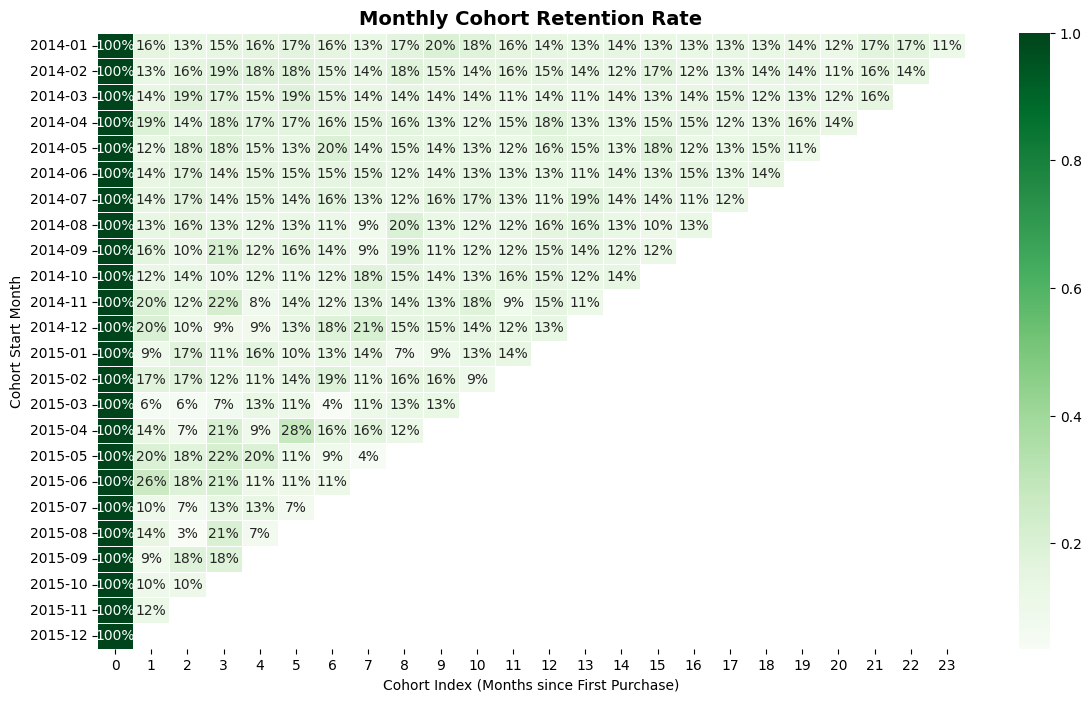

In [ ]:
df["cohort_month"] = df.groupby("Member_number")["Date"].transform("min").dt.to_period("M")  # Tháng đầu tiên mua hàng
df["month"] = df["Date"].dt.to_period("M")  # Tháng của từng giao dịch

# Tạo Cohort Index
df["cohort_index"] = (df["month"] - df["cohort_month"]).apply(lambda x: x.n)

# Nhóm dữ liệu theo cohort_month và cohort_index
cohort_data = df.groupby(["cohort_month", "cohort_index"])["Member_number"].nunique().unstack()

# Tính tỷ lệ Retention
cohort_size = cohort_data.iloc[:, 0]  # Số lượng khách hàng ban đầu của từng cohort
retention_rate = cohort_data.divide(cohort_size, axis=0)

# Vẽ biểu đồ heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(retention_rate, annot=True, fmt=".0%", cmap="Greens", linewidths=0.5)

plt.title("Monthly Cohort Retention Rate", fontsize=14, fontweight="bold")
plt.xlabel("Cohort Index (Months since First Purchase)")
plt.ylabel("Cohort Start Month")
plt.yticks(rotation=0)
plt.show()


Hầu hết các Cohort mất hơn 80% khách hàng chỉ sau 2-3 tháng đầu tiên.

Từ tháng thứ 4 trở đi, retention rate chỉ còn khoảng 10-20%.

Điều này cho thấy khách hàng có xu hướng chỉ mua hàng một lần hoặc một vài lần rồi rời đi.

In [ ]:
df_products = df[['productName', 'price']].groupby('productName')['price'].mean().reset_index()
df_products

,productName,price
0,Instant food products,0.60
1,UHT-milk,2.10
2,abrasive cleaner,6.38
3,artif. sweetener,2.10
4,baby cosmetics,25.50
...,...,...
162,white bread,0.30
163,white wine,14.20
164,whole milk,1.80
165,yogurt,2.20


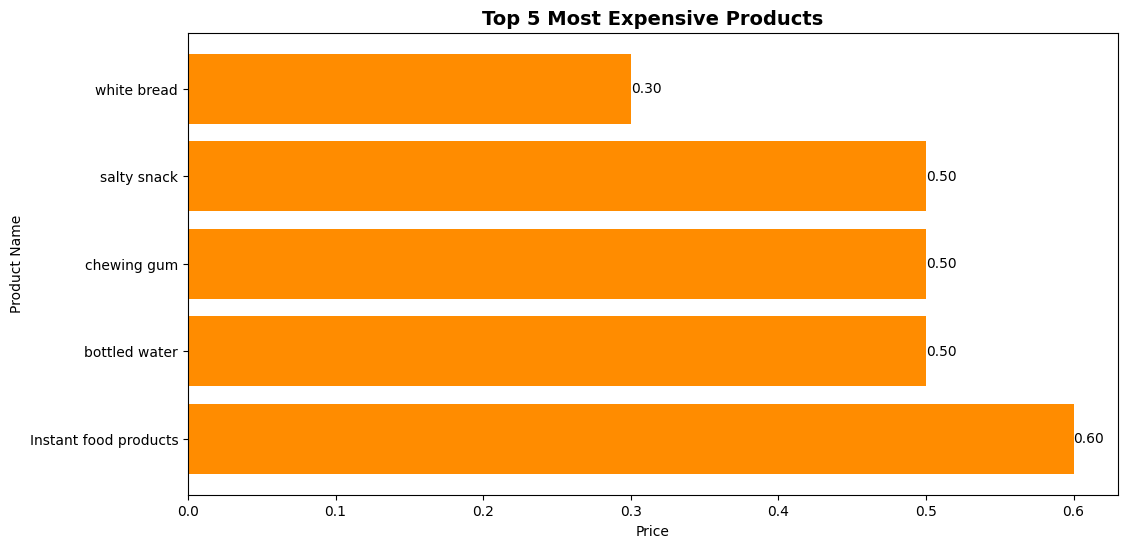

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_top5 = df_products.sort_values('price', ascending=True).head(5)
# Vẽ biểu đồ cột ngang
plt.figure(figsize=(12, 6))
plt.barh(df_top5["productName"], df_top5["price"], color="darkorange")

# Thêm nhãn và tiêu đề
plt.xlabel("Price")
plt.ylabel("Product Name")
plt.title("Top 5 Most Expensive Products", fontsize=14, fontweight="bold")

# Hiển thị giá trị trên cột
for index, value in enumerate(df_top5["price"]):
    plt.text(value, index, f"{value:,.02f}", va='center')

# Đảo trục y để sản phẩm giá cao nhất nằm trên cùng
plt.gca().invert_yaxis()

# Hiển thị biểu đồ
plt.show()


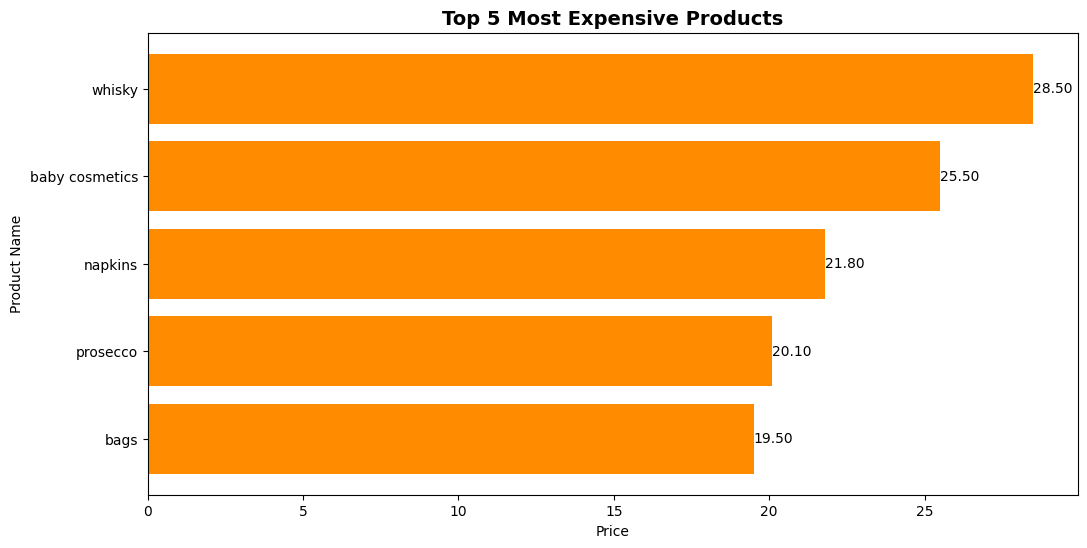

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df_top5 = df_products.sort_values('price', ascending=False).head(5)
# Vẽ biểu đồ cột ngang
plt.figure(figsize=(12, 6))
plt.barh(df_top5["productName"], df_top5["price"], color="darkorange")

# Thêm nhãn và tiêu đề
plt.xlabel("Price")
plt.ylabel("Product Name")
plt.title("Top 5 Most Expensive Products", fontsize=14, fontweight="bold")

# Hiển thị giá trị trên cột
for index, value in enumerate(df_top5["price"]):
    plt.text(value, index, f"{value:,.02f}", va='center')

# Đảo trục y để sản phẩm giá cao nhất nằm trên cùng
plt.gca().invert_yaxis()

# Hiển thị biểu đồ
plt.show()
